In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Ketchup.csv")
df.head()

,Unnamed: 0,Ketchup.hid,Ketchup.id,Ketchup.choice,price.heinz,price.hunts,price.delmonte,price.stb
0,1,1,1,heinz,1.19,1.39,1.49,0.89
1,2,1,2,heinz,0.99,1.36,1.39,0.95
2,3,1,3,hunts,1.46,1.43,1.49,0.99
3,4,1,4,hunts,1.46,1.43,1.45,0.99
4,5,1,5,stb,1.46,1.36,1.39,0.95


In [3]:
df['Ketchup.choice'].value_counts()

heinz       2526
stb         1155
hunts       1019
delmonte     256
Name: Ketchup.choice, dtype: int64

In [4]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [5]:
df.head()

,Ketchup.hid,Ketchup.id,Ketchup.choice,price.heinz,price.hunts,price.delmonte,price.stb
0,1,1,heinz,1.19,1.39,1.49,0.89
1,1,2,heinz,0.99,1.36,1.39,0.95
2,1,3,hunts,1.46,1.43,1.49,0.99
3,1,4,hunts,1.46,1.43,1.45,0.99
4,1,5,stb,1.46,1.36,1.39,0.95


In [6]:
df['Ketchup.hid'].value_counts()

1080    24
81      22
1196    20
939     20
1300    20
        ..
999      1
998      1
138      1
139      1
1956     1
Name: Ketchup.hid, Length: 1956, dtype: int64

In [7]:
df['Ketchup.id'].value_counts()

1     1956
2      994
3      605
4      405
5      270
6      193
7      136
8       94
9       70
10      50
11      36
12      31
13      23
14      18
15      16
16      15
17      13
18      12
19       8
20       5
21       2
22       2
23       1
24       1
Name: Ketchup.id, dtype: int64

In [8]:
df.isnull().sum()

Ketchup.hid       0
Ketchup.id        0
Ketchup.choice    0
price.heinz       0
price.hunts       0
price.delmonte    0
price.stb         0
dtype: int64

In [9]:
df.drop_duplicates(keep='first',inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4956 entries, 0 to 4955
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ketchup.hid     4956 non-null   int64  
 1   Ketchup.id      4956 non-null   int64  
 2   Ketchup.choice  4956 non-null   object 
 3   price.heinz     4956 non-null   float64
 4   price.hunts     4956 non-null   float64
 5   price.delmonte  4956 non-null   float64
 6   price.stb       4956 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 309.8+ KB


In [11]:
df.describe()

,Ketchup.hid,Ketchup.id,price.heinz,price.hunts,price.delmonte,price.stb
count,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000
mean,936.721550,3.095642,1.248900,1.343860,1.426945,0.921178
std,549.104119,3.065865,0.204913,0.176185,0.114157,0.068198
min,1.000000,1.000000,0.790000,0.790000,0.890000,0.750000
25%,463.750000,1.000000,0.990000,1.360000,1.390000,0.890000
50%,923.000000,2.000000,1.190000,1.390000,1.460000,0.950000
75%,1406.000000,4.000000,1.460000,1.430000,1.490000,0.950000
max,1956.000000,24.000000,1.470000,1.530000,1.490000,0.990000


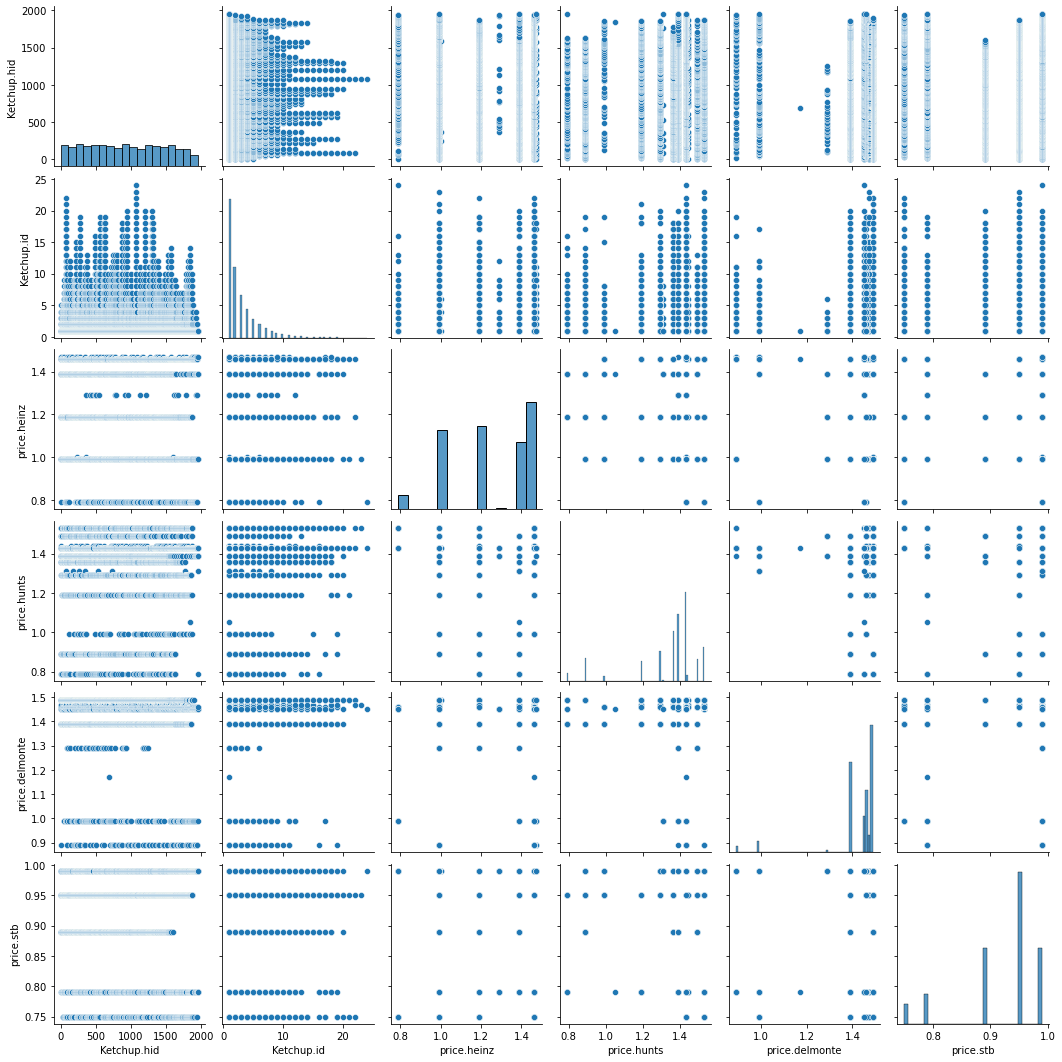

In [12]:
sns.pairplot(data=df)
plt.show()

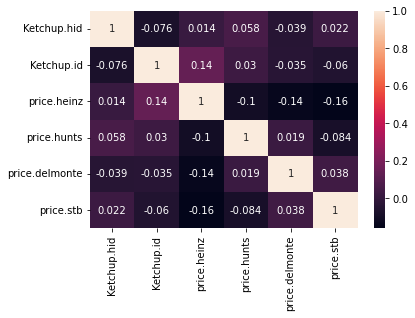

In [13]:
sns.heatmap(df.corr(),annot=True)
plt.show()

<Figure size 1440x1008 with 0 Axes>

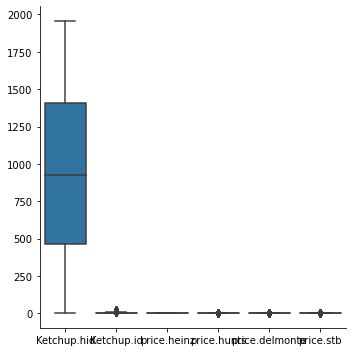

In [14]:
plt.figure(figsize=(20,14))
sns.catplot(data=df,kind="box")
plt.show()

In [15]:
target=df.iloc[:,-5]
features=df.iloc[:,:-1]

In [16]:
z=features
y=target

In [17]:
y.head()

0    heinz
1    heinz
2    hunts
3    hunts
4      stb
Name: Ketchup.choice, dtype: object

In [18]:
x=z.drop(['Ketchup.choice'],axis=1)

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=0)

In [20]:
x.head()

,Ketchup.hid,Ketchup.id,price.heinz,price.hunts,price.delmonte
0,1,1,1.19,1.39,1.49
1,1,2,0.99,1.36,1.39
2,1,3,1.46,1.43,1.49
3,1,4,1.46,1.43,1.45
4,1,5,1.46,1.36,1.39


In [21]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(xtrain,ytrain)

SVC()

In [22]:
tr=svm.score(xtrain,ytrain)
te=svm.score(xtest,ytest)
ypred=svm.predict(xtest)
print(f"Training Accu : {tr}\nTestig Accu : {te}")

Training Accu : 0.5041798789276448
Testig Accu : 0.5225285810356423


In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)

print(f"Ac Score: {ac}\n\nConfusion Matrix: \n{cm}\n\nClass_report : \n{cr}")

Ac Score: 0.5225285810356423

Confusion Matrix: 
[[  0  73   0   0]
 [  0 777   0   0]
 [  0 294   0   0]
 [  0 343   0   0]]

Class_report : 
              precision    recall  f1-score   support

    delmonte       0.00      0.00      0.00        73
       heinz       0.52      1.00      0.69       777
       hunts       0.00      0.00      0.00       294
         stb       0.00      0.00      0.00       343

    accuracy                           0.52      1487
   macro avg       0.13      0.25      0.17      1487
weighted avg       0.27      0.52      0.36      1487



In [24]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtr=ss.fit_transform(xtrain)
xte=ss.fit_transform(xtest)

In [25]:
svm.fit(xtr,ytrain)
ypred=svm.predict(xte)

tr=svm.score(xtr,ytrain)
te=svm.score(xte,ytest)
ypred=svm.predict(xte)
print(f"Training Accu : {tr}\nTestig Accu : {te}")

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)

print(f"Ac Score: {ac}\n\nConfusion Matrix: \n{cm}\n\nClass_report : \n{cr}")

Training Accu : 0.6053617757278754
Testig Accu : 0.6227303295225286
Ac Score: 0.6227303295225286

Confusion Matrix: 
[[ 23  39   6   5]
 [  5 667  54  51]
 [  5 134 120  35]
 [  4 198  25 116]]

Class_report : 
              precision    recall  f1-score   support

    delmonte       0.62      0.32      0.42        73
       heinz       0.64      0.86      0.73       777
       hunts       0.59      0.41      0.48       294
         stb       0.56      0.34      0.42       343

    accuracy                           0.62      1487
   macro avg       0.60      0.48      0.51      1487
weighted avg       0.61      0.62      0.60      1487



In [26]:
#this dataset is underfitted.